# Lead Scoring - Logistic Regression

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:image.pngAs you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Steps involved:

1. Import all the important libraries
2. Importing and Reading the Data
3. Inspecting the Data
4. Data Cleaning
5. Exploratory Data Analysis
6. Data Preparation
7. Test-Train Split
8. Feature Scaling
9. Model Building
10. Plotting the ROC Curve
11. Finding Optimal Cutoff Point
12. Making predictions on the test set

# Step1: Import all the important libraries

In [24]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# Step 2:  Importing the Data

In [25]:
# Importing all datasets
Lead_data = pd.read_csv("Leads.csv")
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Step 3: Inspecting the Data

Check the dimensions of the dataset

In [26]:
Lead_data.shape

(9240, 37)

As seen from above - it has 9240 records and 37 Variables.

Check the statistics of the dataset

In [27]:
Lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


Check the dataset information

In [28]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [29]:
Lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# Step 4: Data Cleaning

In [30]:
#checking duplicates
sum(Lead_data.duplicated(subset = 'Prospect ID')) == 0

True

No duplicate values are available

Check missing values in the dataset

In [31]:
Lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [32]:
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [33]:
#As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
#Select values are as good as NULL.

#Converting 'Select' values to NaN.
Lead_data = Lead_data.replace('Select', np.nan)

In [34]:
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [35]:
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [36]:
# Seems a lot of columns with nulls and missing values We should handle Missing Values.We will drop the columns having more than 70% NA values.
Lead_data = Lead_data.drop(Lead_data.loc[:,list(round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)>70)].columns, 1)

In [37]:
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [38]:
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Now we will take care of null values in each column one by one.

Visualise the countplots for the column Lead Quality.

In [39]:
Lead_data['Lead Quality'].describe()


count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

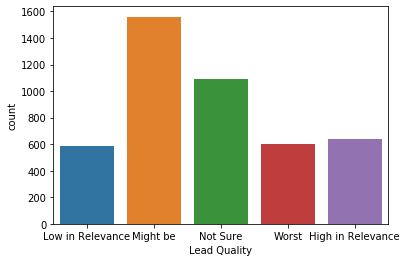

In [40]:
sns.countplot(Lead_data['Lead Quality'])

In [41]:
# Lead Quality: Indicates the quality of lead based on the data and intuition the employee who has been assigned to the lead
# Hence it is quite possible that all the 'nulls' mean that the quality of the lead is not surely known or can't be assigned.
# Out of 4767 rows in Lead Quality columns we have 52% nulls. Value for these nulls may be imputed with 'Not Sure'.
Lead_data['Lead Quality'] = Lead_data['Lead Quality'].replace(np.nan, 'Not Sure')

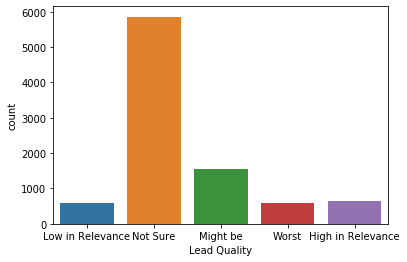

In [42]:
sns.countplot(Lead_data['Lead Quality'])

Visualise the data for column City.

City: The city of the customer

In [43]:
Lead_data.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

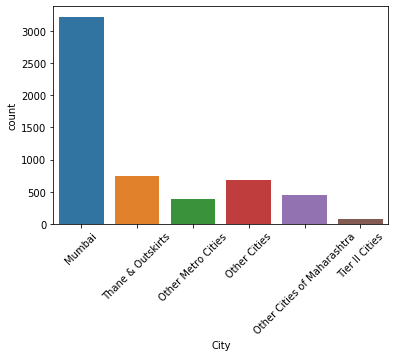

In [44]:
# lets visualise the countplots of each value in the column City.
sns.countplot(Lead_data.City)
xticks(rotation = 45)

Around 60% of the data is Mumbai so we can impute Mumbai in the missing values.

In [45]:
Lead_data['City'] = Lead_data['City'].replace(np.nan, 'Mumbai')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

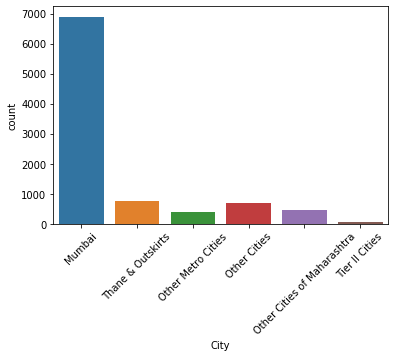

In [46]:
sns.countplot(Lead_data.City)
xticks(rotation = 45)

##### Visualise the data for column as they seem to have too many nulls(46% as seen from above) 
- Asymmetrique Activity Index  
- Asymmetrique Profile Index 
- Asymmetrique Activity Score
- Asymmetrique Profile Score  

An index and score assigned to each customer based on their activity and their profile

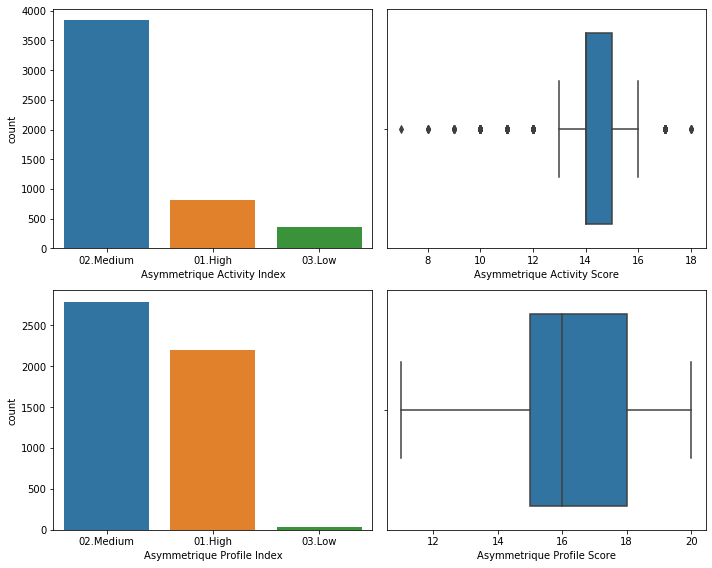

In [47]:
fig, axs = plt.subplots(2,2, figsize = (10,8))
plt1 = sns.countplot(Lead_data['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(Lead_data['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(Lead_data['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(Lead_data['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

There is too much variation (Highly skewed) in thes parameters so its not reliable to impute any value in it. 
 45% null values means we need to drop these columns.

In [1577]:
Lead_data = Lead_data.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],1)


Visualize data for column Specialization

In [1578]:
#Specialization: The industry domain in which the customer worked before.
#It Includes the level 'Select Specialization' which means customer had not selected this option while filling the form.

In [1579]:
Lead_data.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

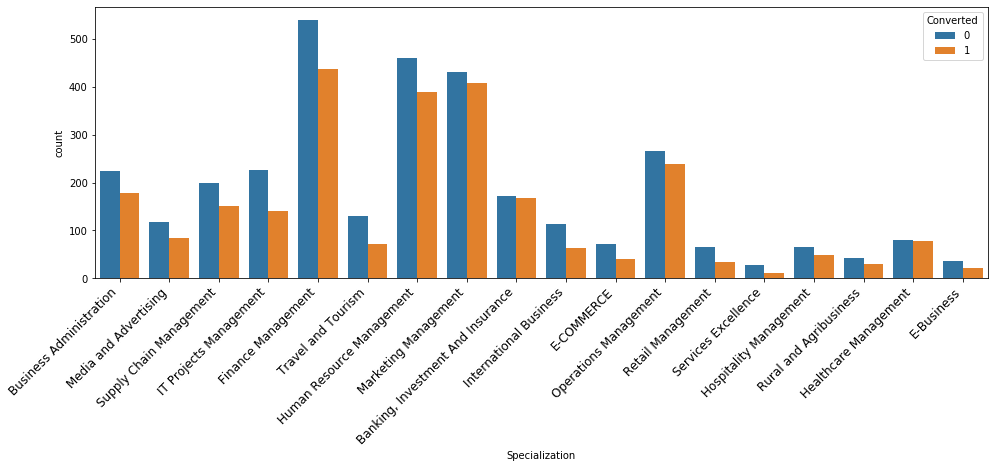

In [1580]:
plt.figure(figsize=(16, 5))
plt.xticks(rotation=45,fontsize=12,horizontalalignment='right')
sns.countplot(Lead_data.Specialization,hue=Lead_data.Converted)

Inference:
- It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list,may not have any specialization or is a student.Hence we can make a category "Others" for missing values. 
- We can also see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

In [1581]:
Lead_data['Specialization'] = Lead_data['Specialization'].replace(np.nan, 'Others')

####  Visualize data for column Tags :Tags assigned to customers indicating the current status of the lead.

In [1582]:
Lead_data.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

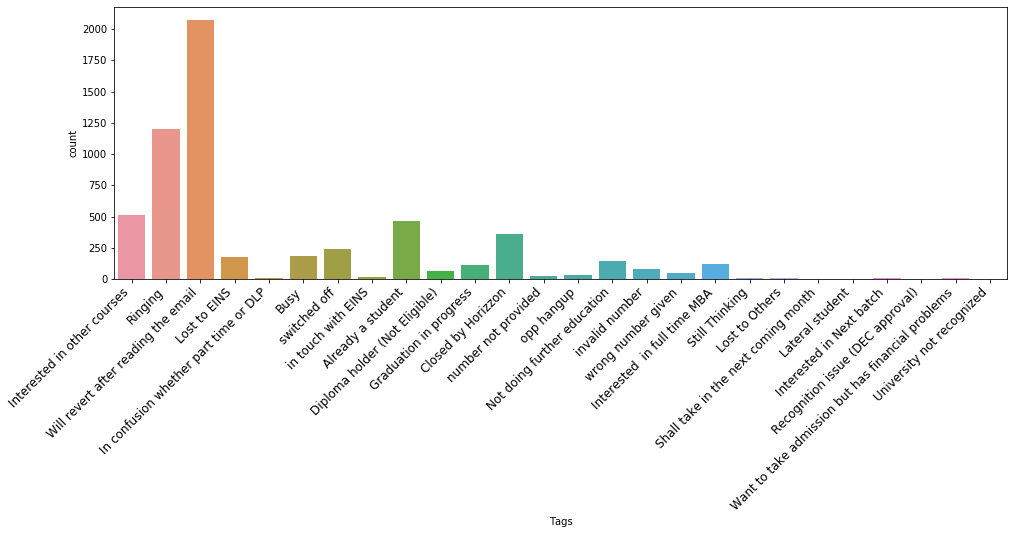

In [1583]:
plt.figure(figsize = (16,5))
plt.xticks(rotation=45,fontsize=12,horizontalalignment='right')
sns.countplot(Lead_data.Tags)
plt.show()

The missing values will be imputed by 'Will revert after reading the email' as that seems to be the most frequent value

In [1584]:
Lead_data['Tags'] = Lead_data['Tags'].replace(np.nan, 'Will revert after reading the email')

#### Visualize data for column 'What matters most to you in choosing a course'.

What matters most to you in choosing a course: An option selected by the customer indicating what is their main motto behind doing this course.

In [1585]:
Lead_data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [1586]:
# Blanks in the this column may be imputed by 'Better Career Prospects'.

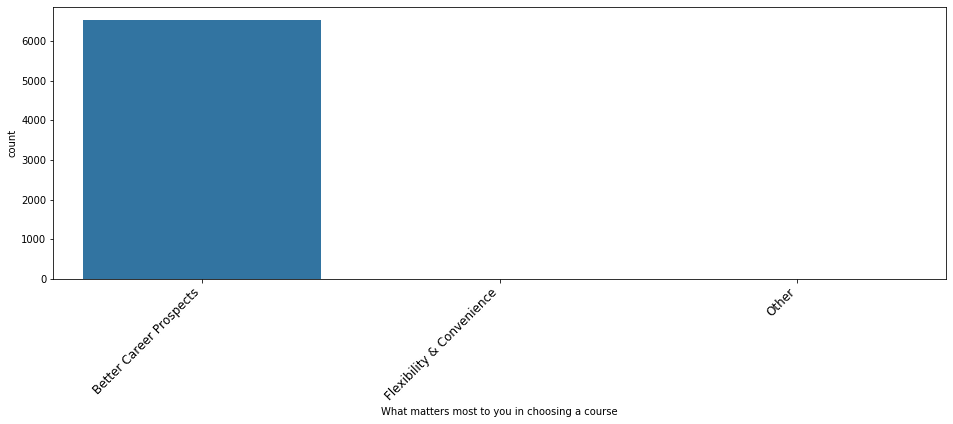

In [1587]:
plt.figure(figsize = (16,5))
plt.xticks(rotation=45,fontsize=12,horizontalalignment='right')
sns.countplot(Lead_data['What matters most to you in choosing a course'])
plt.show()

In [1588]:
Lead_data['What matters most to you in choosing a course'] = Lead_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')


#### Visualize data for column Occupation

What is your current occupation: Indicates whether the customer is a student, umemployed or employed

In [1589]:
# lets see the occupation coloumn.
Lead_data['What is your current occupation'].describe()


count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

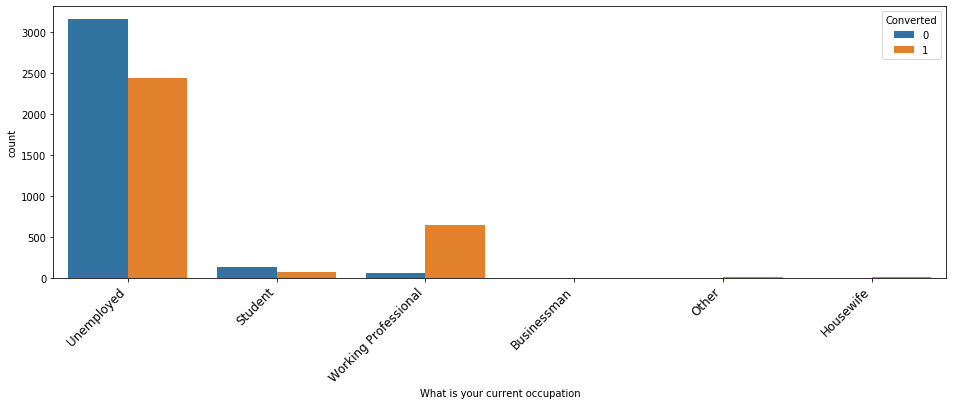

In [1590]:
plt.figure(figsize = (16,5))
plt.xticks(rotation=45,fontsize=12,horizontalalignment='right')
sns.countplot(Lead_data['What is your current occupation'],hue=Lead_data.Converted)
plt.show()

Inference:
- Occupation indicates if the customer is student,employed or unemployed. Since we have 26% nulls, we can assume here that nulls in the Occupation may be imputed by <i>'Unemployed'</i>
- Unemployed leads are the most in terms of Absolute numbers.
- Working Professionals  have high chances of joining the course.

In [1591]:
Lead_data['What is your current occupation'] = Lead_data['What is your current occupation'].replace(np.nan, 'Unemployed')


#### Visualize the data for column Country

In [1592]:
# Country : The country of the customer.


In [1593]:
Lead_data.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

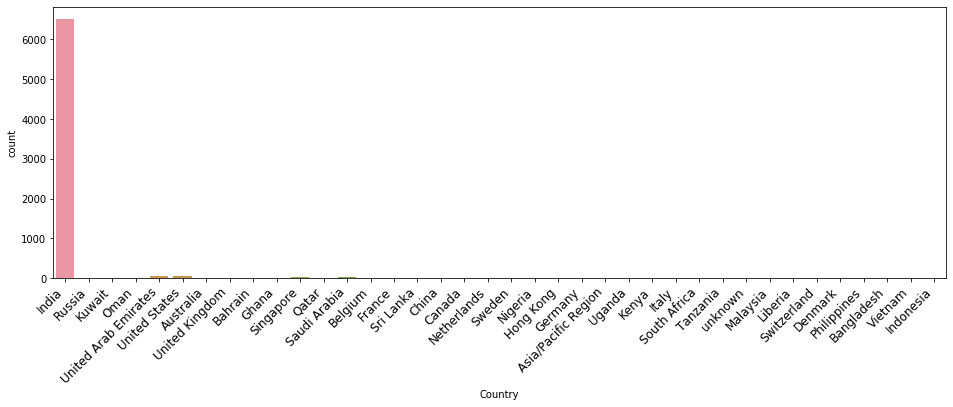

In [1594]:
plt.figure(figsize = (16,5))
plt.xticks(rotation=45,fontsize=12,horizontalalignment='right')
sns.countplot(Lead_data['Country'])
plt.show()

For most values the country is 'India' so let's impute the same in missing values.

In [1595]:
Lead_data['Country'] = Lead_data['Country'].replace(np.nan, 'India')


In [1596]:
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)


Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

All the remaining values are under 2% and hence we can drop them

In [1597]:
Lead_data.dropna(inplace = True)

Lets recheck the misssing values again

In [1598]:
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)


Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

#### Hence now all the missing values are removed from the data.

# Step 5: Exploratory Data Analysis

##### Explore data for column - What matters most to you in choosing a course

In [1599]:
Lead_data['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

Inference
- Most entries are 'Better Career Prospects' however no specific Inference can be drawn from the data in this column

##### Explore data for column Search

In [1600]:
Lead_data['Search'].describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

Inference
- As seen from above most entries are 'No' however no specific inference can be drawn from the data in this column

##### Explore data for column Magazine

In [1601]:
Lead_data['Magazine'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

Inference
- As seen from above Most entries are 'No' however no specific inference can be drawn from the data in this column

##### Explore data for column Newspaper Article

In [1602]:
Lead_data['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

Inference
- Most entries are 'No' however no inference can be drawn from the data in this column

##### Explore data for column X Education Forums

In [1603]:
Lead_data['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

Inference
- Most entries are 'No' and no specific inference can be drawn with the data in this column

##### Explore data for column Newspaper

In [1604]:
Lead_data['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

Inference
- Most entries are 'No' and no specific inference can be drawn with the data in this column

##### Explore data for column Digital Advertisement

In [1605]:
Lead_data['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

Inference
- Most entries are 'No' and no specific inference can be drawn with the data in this column

##### Explore data for column Through Recommendations

In [1606]:
Lead_data['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

Inference
- Most entries are 'No' and no specific inference can be drawn with the data in this column

##### Explore data for column - Receive More Updates About Our Courses

In [1607]:
Lead_data['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

Inference
- Most entries are 'No' and no specific inference can be drawn with the data in this column

##### Explore data for column Update me on Supply Chain Content

In [1608]:
Lead_data['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

Inference
- Most entries are 'No' and no specific inference can be drawn with the data in this column

##### Explore data for column Get updates on DM Content

In [1609]:
Lead_data['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

Inference
- Most entries are 'No' and no specific inference can be drawn with the data in this column

##### Explore data for column I agree to pay the amount through cheque

In [1610]:
Lead_data['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

Inference
- Most entries are 'No' and no specific inference can be drawn with the data in this column

##### Explore data for column  A free copy of Mastering The Interview

In [1611]:
Lead_data['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

Inference
- Most entries are 'No' and no specific inference can be drawn with the data in this column

Now the Data is clean and we can start the analysis part

# Univariate Analysis

Target Variable : <b>Converted</b>.Indicates whether a lead has been successfully converted (1) or not (0).

In [1612]:
converted = (sum(Lead_data['Converted'])/len(Lead_data['Converted'].index))*100
converted

37.85541106458012

Inference: 
- Approximately 38 % of customers are getting converted so it seems data is not imbalanced

#####  Visualize data for column 'Lead Origin' with respect to Target Variable 'Converted'

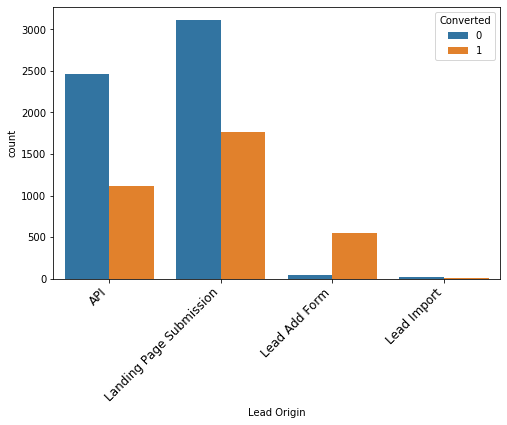

In [1613]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=45,fontsize=12,horizontalalignment='right')
sns.countplot(x = "Lead Origin", hue = "Converted", data = Lead_data)
plt.show()

Inference
- Lead Add Form has a very high conversion rate but count of leads are not very high.
- API and Landing Page Submission bring higher number of leads as well as conversion
- Lead Import and Quick Add Form get very few leads


__To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.__

#####  Visualize data for column 'Lead Source' with respect to Target Variable 'Converted'

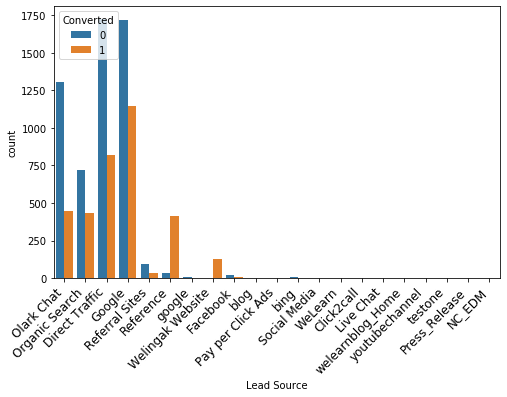

In [1614]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=45,fontsize=12,horizontalalignment='right')
sns.countplot(Lead_data['Lead Source'], hue=Lead_data.Converted)
plt.show()

Inference:
- <i>'google'</i> is redundant

In [1615]:
# correcting the spelling of google
Lead_data['Lead Source'] = Lead_data['Lead Source'].replace(['google'], 'Google')

- Columns like 'Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release','Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel' have very less lead numbers. Grouping them together as <i>'Others'</i>.

In [1616]:
Lead_data['Lead Source'] = Lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

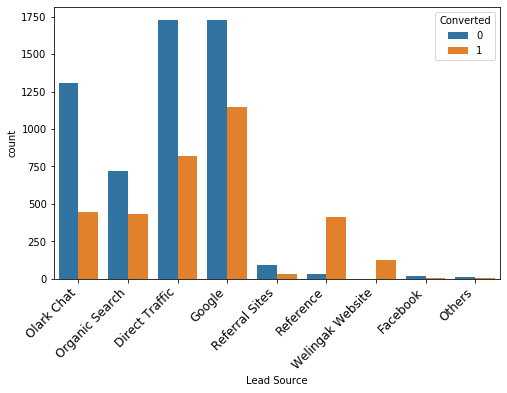

In [1617]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=45,fontsize=12,horizontalalignment='right')
sns.countplot(Lead_data['Lead Source'], hue=Lead_data.Converted)
plt.show()

Inference
- Conversion Rate of reference leads and leads through welingak website is high. 
- Google and Direct traffic generates maximum number of leads.
 

__To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google  leads and generate more leads from reference and welingak website.__

##### Visualize the data for columns - Do not Email and Do not Call with respect to the Target variable

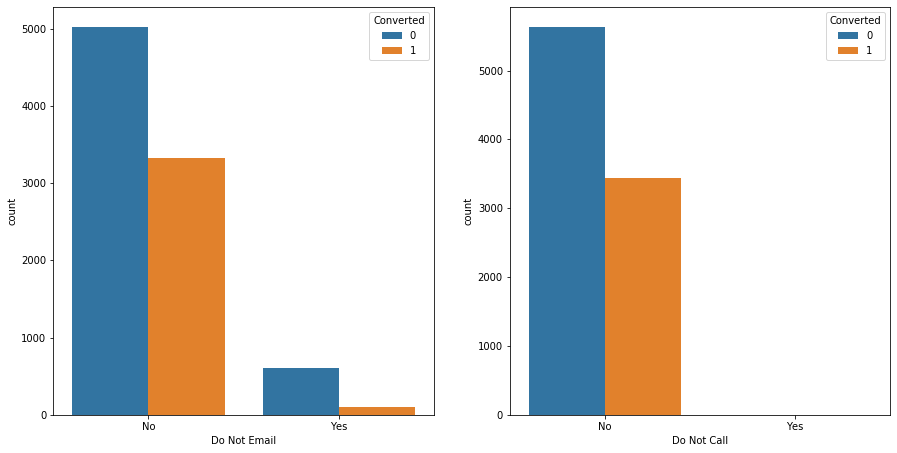

In [1618]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = Lead_data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = Lead_data, ax = axs[1])

Inference
- We see that people who have not opted for these services have a low conversion rate 

#### Visualize data for Total Visits 

In [1619]:
Lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

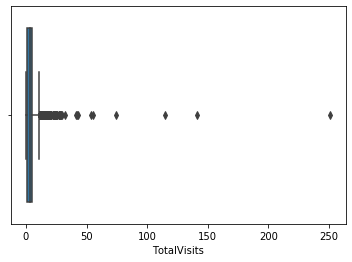

In [1620]:
sns.boxplot(Lead_data['TotalVisits'])

There are a number of outliers in this column.We will treat the outliers to 95% value for further analysis.

In [1621]:
percentiles = Lead_data['TotalVisits'].quantile([0.05,0.95]).values
Lead_data['TotalVisits'][Lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
Lead_data['TotalVisits'][Lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]


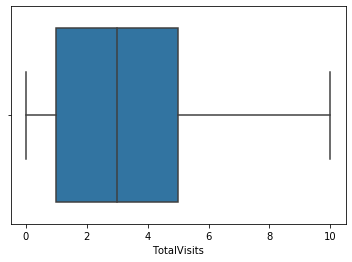

In [1622]:
sns.boxplot(Lead_data['TotalVisits'])


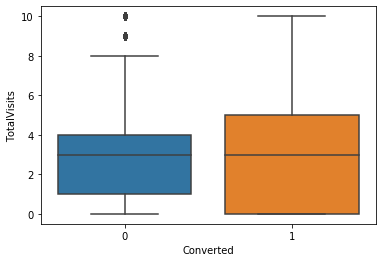

In [1623]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = Lead_data)

Inference
- Median for converted and not converted leads are the same.

Nothng conclusive can be said on the basis of Total Visits.

##### Visualize data for column Total time spent on website

In [1624]:
Lead_data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

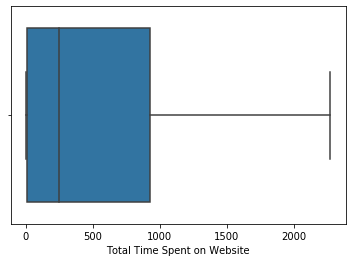

In [1625]:
sns.boxplot(Lead_data['Total Time Spent on Website'])


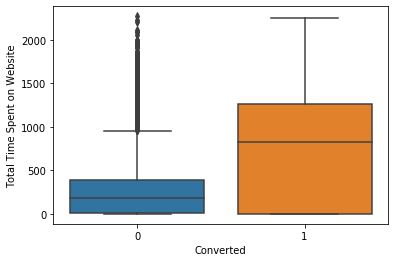

In [1626]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = Lead_data)

Inference
- Leads spending more time on the weblise are more likely to be converted. Improvement in website to make it more user helpful and improve user experience and to keep them engaged on the website is recommended

##### Visualize data for column Page views per visit

In [1627]:
Lead_data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

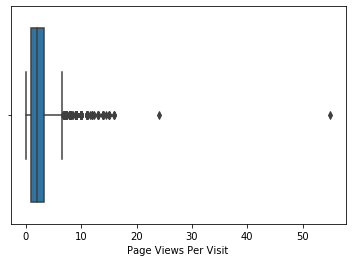

In [1628]:
sns.boxplot(Lead_data['Page Views Per Visit'])


There are a number of outliers in this column.We will treat the outliers to 95% value for analysis.

In [1629]:
percentiles = Lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
Lead_data['Page Views Per Visit'][Lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
Lead_data['Page Views Per Visit'][Lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]


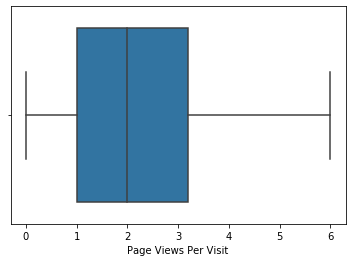

In [1630]:
sns.boxplot(Lead_data['Page Views Per Visit'])

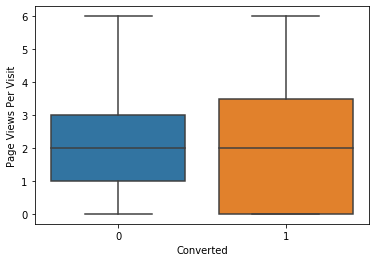

In [1631]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = Lead_data)


Inference :
- Median for converted and unconverted leads is the same.Nothing can be said specifically for lead conversion from <i>Page Views Per Visit</i>

##### Visualize the data for column Last Activity

In [1632]:
Lead_data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

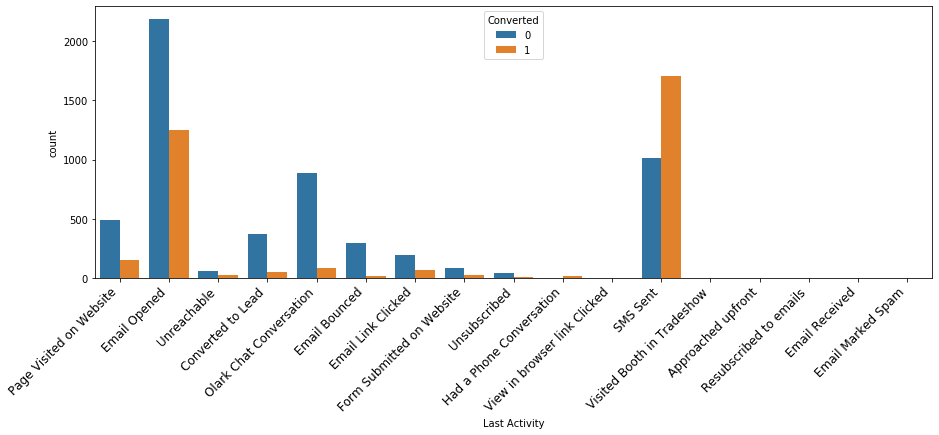

In [1633]:
figsize = plt.subplots(figsize = (15,5))
plt.xticks(rotation=45,fontsize=12,horizontalalignment='right')
sns.countplot(x = "Last Activity", hue = Lead_data.Converted , data = Lead_data)
plt.show()

Let's keep considerable last activities as such and club all others to "Other_Activity"

In [1634]:
Lead_data['Last Activity'] = Lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')


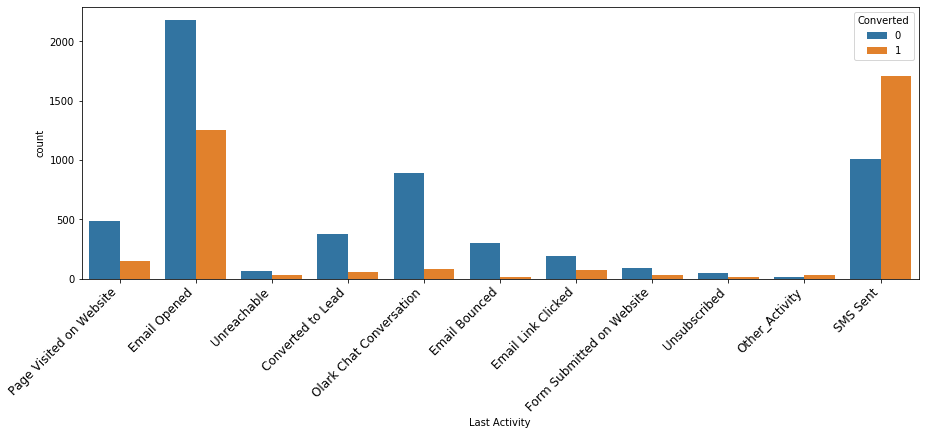

In [1635]:
figsize = plt.subplots(figsize = (15,5))
plt.xticks(rotation=45,fontsize=12,horizontalalignment='right')
sns.countplot(x = "Last Activity", hue = Lead_data.Converted , data = Lead_data)
plt.show()

Inference
- Most of the lead have their Email opened as their last activity.
- SMS Sent has a high Conversion rate for leads as their last activity.

##### Visualize the data for column Country

In [1636]:
Lead_data.Country.describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

Inference

- Most values are 'India' no such inference can be drawn

##### Visualize data for column Specialization

In [1637]:
Lead_data.Specialization.describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

In [1638]:
Lead_data['Specialization'] = Lead_data['Specialization'].replace(['Others'], 'Other_Specialization')

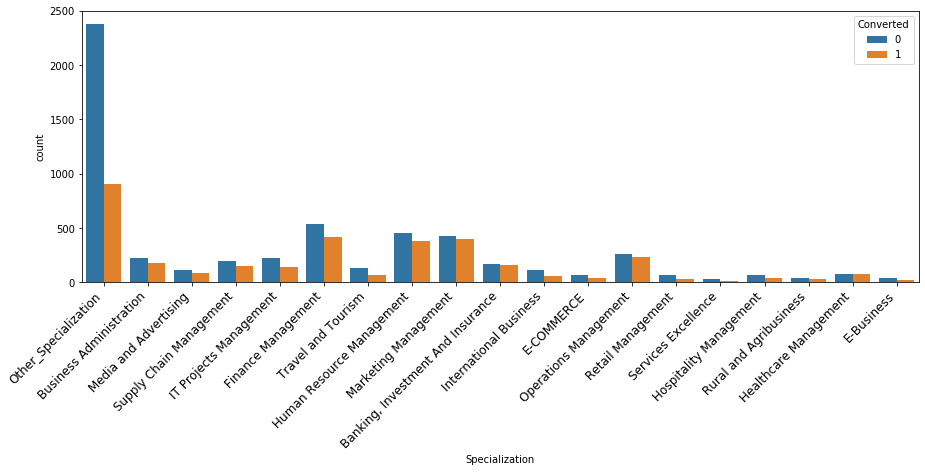

In [1639]:
fig, axs = plt.subplots(figsize = (15,5))
plt.xticks(rotation=45,fontsize=12,horizontalalignment='right')
sns.countplot(x = "Specialization", hue = "Converted", data = Lead_data)
plt.show()

#### Inference
1. Focus should be more on the Specialization with high conversion rate.

##### Visualize data for column Occupation

In [1640]:
Lead_data['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

In [1641]:
Lead_data['What is your current occupation'] = Lead_data['What is your current occupation'].replace(['Other'], 'Other_Occupation')

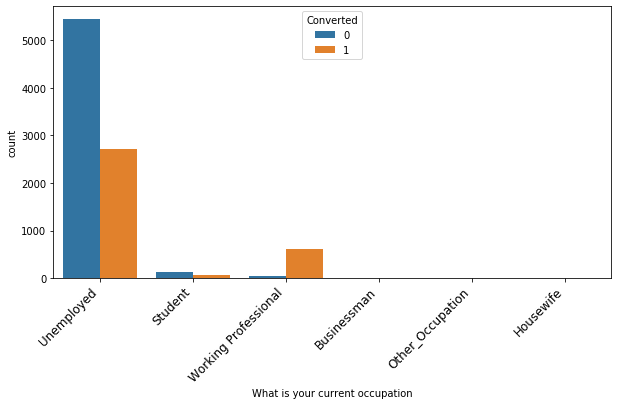

In [1642]:
fig, axs = plt.subplots(figsize = (10,5))
plt.xticks(rotation=45,fontsize=12,horizontalalignment='right')
sns.countplot(x = "What is your current occupation", hue = "Converted", data = Lead_data)
plt.show()

Inference
- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in numbers but has a less conversion rate.

Focus should be on increasing leads on Working Professional and converting more unemployed leads

#### Visualize data for column What matters most to you in choosing a course

In [1643]:
Lead_data['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

#### Conclusion
Most entries are 'Better Career Prospects'. No Inference can be drawn with this parameter.

##### Visualize data for column Search

In [1644]:
Lead_data.Search.describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

#### Conclusion:
Most entries are 'No'. No Inference can be drawn with this parameter.

##### Visualize data for column  Tags

In [1645]:
Lead_data['Tags'].describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

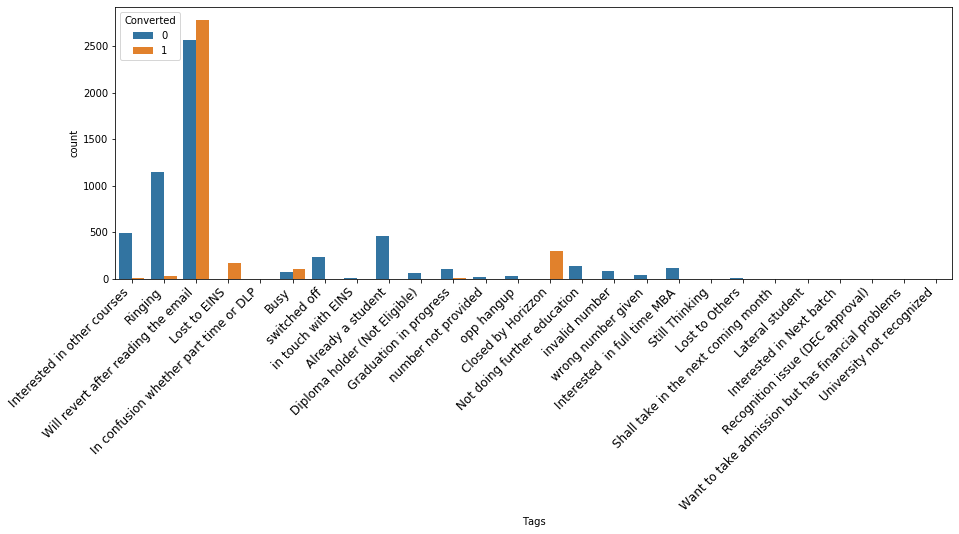

In [1646]:
figaxis = plt.subplots(figsize = (15,5))
plt.xticks(rotation=45,fontsize=12,horizontalalignment='right')
sns.countplot(x = "Tags", hue = "Converted", data = Lead_data)
plt.show()

In [1647]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
Lead_data['Tags'] = Lead_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)','Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch','Recognition issue (DEC approval)','Want to take admission but has financial problems','University not recognized'], 'Other_Tags')

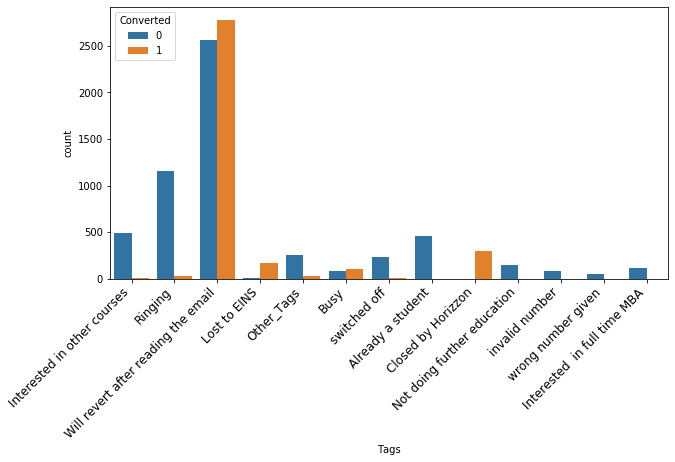

In [1648]:
fig, axs = plt.subplots(figsize = (10,5))
plt.xticks(rotation=45,fontsize=12,horizontalalignment='right')
sns.countplot(x = "Tags", hue = "Converted", data = Lead_data)
plt.show()

Inference:
- From above we see that the tag 'will revert after reading the email' has the highest conversion rate and a large number of leads too. 
- 'Closed by Horizon' has a good amount of conversion rate amopngst all others we should focus on the lead numbers  

##### Visualize data for column Lead Quality

In [1649]:
Lead_data['Lead Quality'].describe()

count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

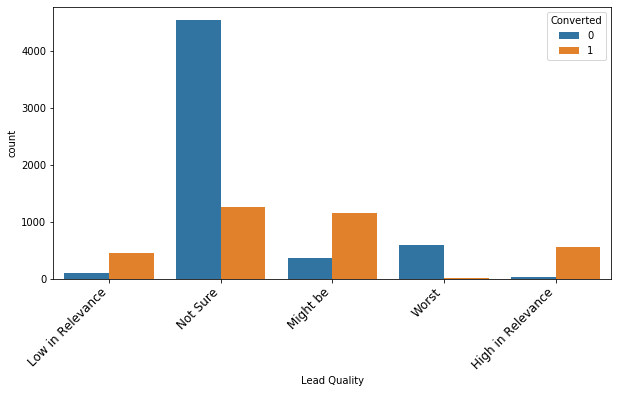

In [1650]:
fig, axs = plt.subplots(figsize = (10,5))
plt.xticks(rotation=45,fontsize=12,horizontalalignment='right')
sns.countplot(x = "Lead Quality", hue = "Converted", data = Lead_data)
plt.show()

Inference
- Might be bracket has a good conversion rate.Focus should be on the lead numbers of 'Might be'.  
- Most of the people are in the 'Not Sure' bracket

##### Visualize data for column City

In [1651]:
Lead_data.City.describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

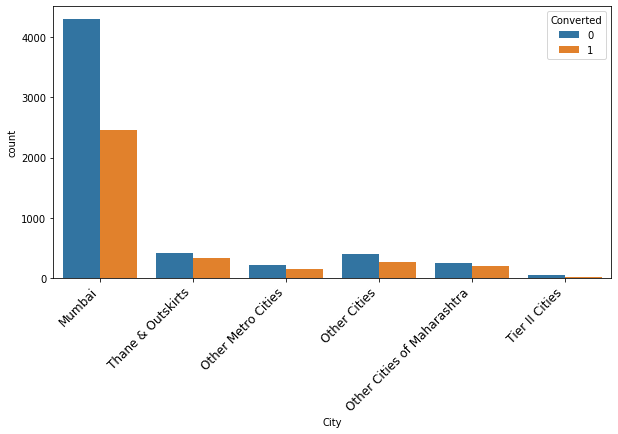

In [1652]:
fig, axs= plt.subplots(figsize=(10,5))
plt.xticks(rotation=45,fontsize=12,horizontalalignment='right')
sns.countplot(x='City', hue='Converted', data=Lead_data)
plt.show()

Inference
- Most leads are from Mumbai city but conversion rate is low and should be foucused on.

##### Visualize data for column Last Notable Activity

In [1653]:
Lead_data['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

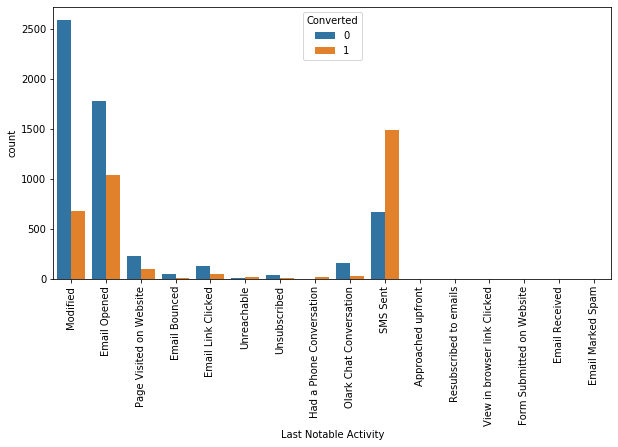

In [1654]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = Lead_data)
xticks(rotation = 90)

Inference
- 'Modified' has most leads  but with very less conversion rate 
- SMS sent has good conversion rate .Focus should be on the number of leads in SMS sent

#### Result:
##### On the basis of the above univariate analysis, it is observed that many columns are not adding any information to the model. Therefore, we can drop them for further analysis

In [1655]:
Lead_data = Lead_data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [1656]:
Lead_data.shape

(9074, 16)

In [1657]:
Lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


# Step 6: Data Preparation
### Converting some binary variables (Yes/No) to 1/0

In [1658]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Lead_data[varlist] = Lead_data[varlist].apply(binary_map)

#### For categorical variables with multiple levels, creating dummy features (one-hot encoded)

In [1659]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


##### Concatenating dataframe

In [1660]:
# Adding the results to the main dataframe
Lead_data = pd.concat([Lead_data, dummy1], axis=1)
Lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


##### Dropping original variables

In [1661]:
#dropping the columns with multiple levels already having the dummy created
Lead_data = Lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [1662]:
Lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1663]:
Lead_data.shape

(9074, 87)

# Step 7: Test-Train Split

##### Updating feature variables to X

In [1664]:
from sklearn.model_selection import train_test_split

X = Lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


##### Updating target variables to y

In [1665]:
y = Lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Splitting the data into train and test

In [1666]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 8: Feature Scaling

In [1667]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1668]:
# Checking the Churn Rate
Converted = (sum(Lead_data['Converted'])/len(Lead_data['Converted'].index))*100
Converted

37.85541106458012

#### This implies that there is 38% conversion

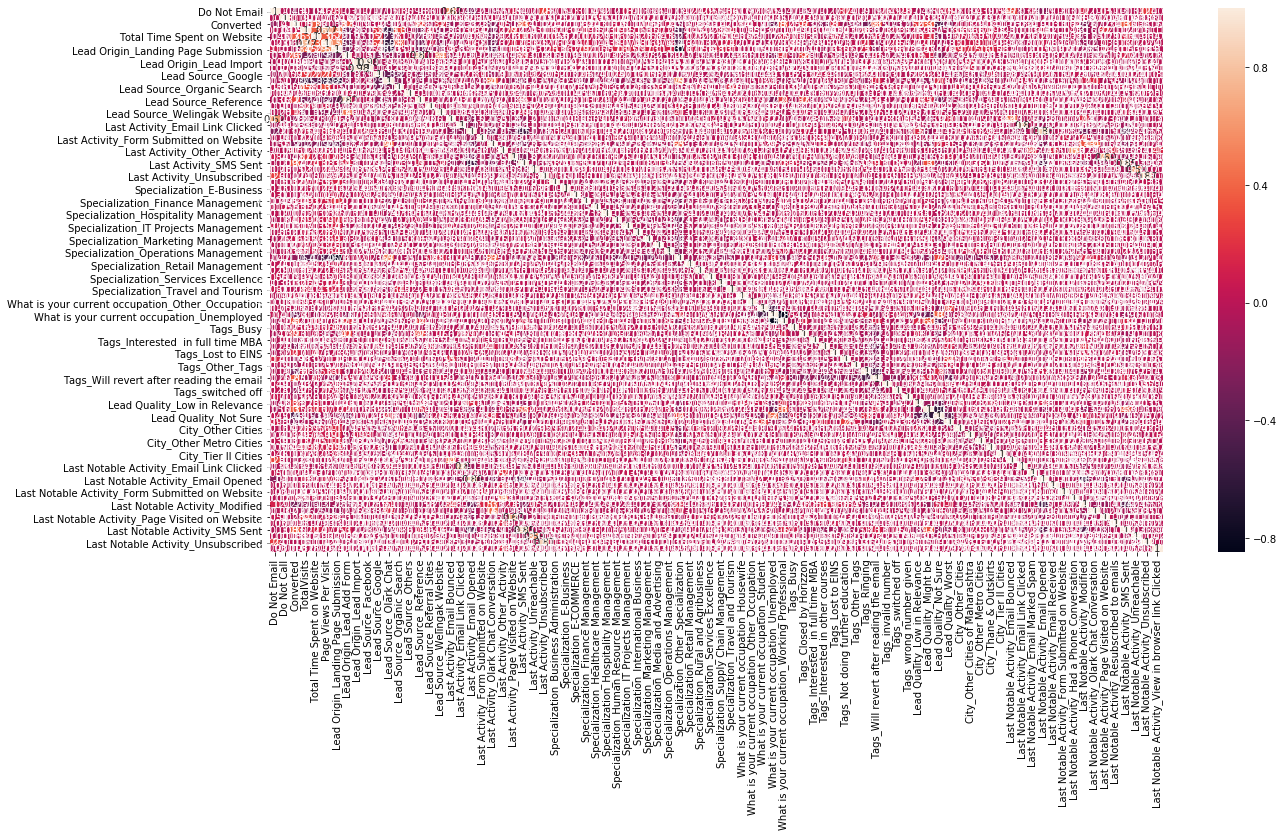

In [1669]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Lead_data.corr(),annot = True)
plt.show()

# Step 9: Model Building


### Creating the first Training model

In [1670]:
import statsmodels.api as sm


In [1671]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6265
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1250.0
Date:                Sun, 31 May 2020   Deviance:                       2500.0
Time:                        21:00:45   Pearson chi2:                 3.87e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.1432   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -1.3882      0.327     -4.243      0.000      -2.030      -0.747
Do Not Call                                             23.7150   1.37e+05      0.000      1.000   -2.68e+05    2.68e+05
TotalVisits                                              0.1816      0.087      2.093      0.036       0.012       0.352
Total Time Spent on Website                              1.1457      0.064     17.913      0.000       1.020       1.271
Page Views Per Visit                                    -0.3272      0.099     -3.309      0.001      -0.521      -0.133
Lead Origin_Landing Page Submission                     -0.9762      0.221     -4.420      0.000      -1.409      -0.543
Lead Origin_Lead Add Form                               -0.4165      1.287     -0.324      0.746      -2.940       2.107
Lead Origin_Lead Import                                 29.7289   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -28.6304   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2017      0.155      1.302      0.193      -0.102       0.505
Lead Source_Olark Chat                                   0.8633      0.234      3.693      0.000       0.405       1.321
Lead Source_Organic Search                               0.2278      0.210      1.083      0.279      -0.185       0.640
Lead Source_Others                                       0.7602      0.816      0.931      0.352      -0.839       2.360
Lead Source_Reference                                    1.7732      1.344      1.319      0.187      -0.861       4.407
Lead Source_Referral Sites                              -0.0945      0.491     -0.193      0.847      -1.056       0.867
Lead Source_Welingak Website                             5.4722      1.486      3.682      0.000       2.559       8.385
Last Activity_Email Bounced                             -0.5488      0.870     -0.631      0.528      -2.254       1.157
Last Activity_Email Link Clicked                         0.8429      0.644      1.309      0.190      -0.419       2.105
Last Activity_Email Opened                              -0.0003      0.384     -0.001      0.999      -0.754       0.753
Last Activity_Form Submitted on Website                  0.1337      0.593      0.225      0.822      -1.028       1.296
Last Activity_Olark Chat Conversation                   -0.5464      0.392     -1.395      0.163      -1.314       0.221
Last Activity_Other_Activity                             1

There are a lot of features as seen from above . We now do Feature Selection using RFE and choose 15 variables.
#### RFE

In [1672]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [1673]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False])

In [1674]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 33),
 ('TotalVisits', False, 43),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 40),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Facebook', False, 49),
 ('Lead Source_Google', False, 38),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Others', False, 46),
 ('Lead Source_Reference', False, 70),
 ('Lead Source_Referral Sites', False, 53),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 28),
 ('Last Activity_Email Link Clicked', False, 36),
 ('Last Activity_Email Opened', False, 60),
 ('Last Activity_Form Submitted on Website', False, 66),
 ('Last Activity_Olark Chat Conversation', False, 13),
 ('Last Activity_Other_Activity', False, 8),
 ('Last Activity_Page Visited on Website', False, 37),
 ('Last Activity_SMS Sent',

##### Lets check columns RFE selected

In [1675]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

##### Lets check columns RFE has not selected

In [1676]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       '

##### Rebuilding the model.

#### Assessing the model with StatsModels

In [1677]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1580.6
Date:                Sun, 31 May 2020   Deviance:                       3161.3
Time:                        21:00:49   Pearson chi2:                 3.11e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8547      0.215     -8.636      0.000      -2.276      -1.434
Do Not Email                                            -1.3106      0.213     -6.154      0.000      -1.728      -0.893
Lead Origin_Lead Add Form                                1.0452      0.360      2.900      0.004       0.339       1.752
Lead Source_Welingak Website                             3.4638      0.817      4.238      0.000       1.862       5.066
What is your current occupation_Working Professional     1.2843      0.287      4.476      0.000       0.722       1.847
Tags_Busy                                                3.5477      0.332     10.680      0.000       2.897       4.199
Tags_Closed by Horizzon                                  7.7377      0.762     10.152      0.000       6.244       9.231
Tags_Lost to EINS                                        8.9540      0.753     11.887      0.000       7.478      10.430
Tags_Ringing                                            -1.9696      0.340     -5.800      0.000      -2.635      -1.304
Tags_Will revert after reading the email                 3.7332      0.228     16.340      0.000       3.285       4.181
Tags_invalid number                                    -23.4649   2.21e+04     -0.001      0.999   -4.34e+04    4.33e+04
Tags_switched off                                       -2.5711      0.589     -4.367      0.000      -3.725      -1.417
Tags_wrong number given                                -23.0779   3.17e+04     -0.001      0.999   -6.21e+04     6.2e+04
Lead Quality_Not Sure                                   -3.3496      0.129    -26.033      0.000      -3.602      -3.097
Lead Quality_Worst                                      -3.7672      0.848     -4.445      0.000      -5.428      -2.106
Last Notable Activity_SMS Sent                           2.7931      0.122     22.838      0.000       2.553       3.033
========================================================================================================================
"""

##### Dropping Tags_invalid number due to high p-value from the RFE columns

In [1678]:
col1 = col.drop('Tags_invalid number',1)
col1

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

##### Rebuilding the model

In [1679]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1586.7
Date:                Sun, 31 May 2020   Deviance:                       3173.3
Time:                        21:00:49   Pearson chi2:                 3.07e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0195      0.217     -9.308      0.000      -2.445      -1.594
Do Not Email                                            -1.3018      0.212     -6.130      0.000      -1.718      -0.886
Lead Origin_Lead Add Form                                1.0769      0.362      2.974      0.003       0.367       1.787
Lead Source_Welingak Website                             3.4268      0.818      4.190      0.000       1.824       5.030
What is your current occupation_Working Professional     1.3240      0.290      4.567      0.000       0.756       1.892
Tags_Busy                                                3.7300      0.331     11.270      0.000       3.081       4.379
Tags_Closed by Horizzon                                  7.8904      0.763     10.345      0.000       6.396       9.385
Tags_Lost to EINS                                        9.1124      0.754     12.086      0.000       7.635      10.590
Tags_Ringing                                            -1.7713      0.338     -5.244      0.000      -2.433      -1.109
Tags_Will revert after reading the email                 3.8970      0.230     16.954      0.000       3.446       4.348
Tags_switched off                                       -2.3666      0.588     -4.028      0.000      -3.518      -1.215
Tags_wrong number given                                -20.8825   1.17e+04     -0.002      0.999   -2.29e+04    2.28e+04
Lead Quality_Not Sure                                   -3.3417      0.128    -26.020      0.000      -3.593      -3.090
Lead Quality_Worst                                      -3.7822      0.848     -4.462      0.000      -5.444      -2.121
Last Notable Activity_SMS Sent                           2.7503      0.120     22.841      0.000       2.514       2.986
========================================================================================================================
"""

##### Dropping Tags_wrong number given from rfe columns due to high p-value.

In [1680]:
col2 = col1.drop('Tags_wrong number given',1)
col2

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

##### Rebuilding the model.

In [1681]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1588.8
Date:                Sun, 31 May 2020   Deviance:                       3177.6
Time:                        21:00:49   Pearson chi2:                 3.08e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0888      0.216     -9.654      0.000      -2.513      -1.665
Do Not Email                                            -1.3012      0.212     -6.134      0.000      -1.717      -0.885
Lead Origin_Lead Add Form                                1.0894      0.363      3.001      0.003       0.378       1.801
Lead Source_Welingak Website                             3.4138      0.818      4.173      0.000       1.810       5.017
What is your current occupation_Working Professional     1.3403      0.291      4.602      0.000       0.769       1.911
Tags_Busy                                                3.8040      0.330     11.532      0.000       3.157       4.450
Tags_Closed by Horizzon                                  7.9562      0.763     10.433      0.000       6.461       9.451
Tags_Lost to EINS                                        9.1785      0.754     12.177      0.000       7.701      10.656
Tags_Ringing                                            -1.6947      0.337     -5.036      0.000      -2.354      -1.035
Tags_Will revert after reading the email                 3.9665      0.229     17.311      0.000       3.517       4.416
Tags_switched off                                       -2.2882      0.587     -3.900      0.000      -3.438      -1.138
Lead Quality_Not Sure                                   -3.3406      0.128    -26.026      0.000      -3.592      -3.089
Lead Quality_Worst                                      -3.7624      0.850     -4.426      0.000      -5.428      -2.096
Last Notable Activity_SMS Sent                           2.7406      0.120     22.847      0.000       2.506       2.976
========================================================================================================================
"""

#### Predicting the y_train values

In [1682]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.188037
1012    0.194070
9226    0.000805
4750    0.782077
7987    0.977003
1281    0.990228
2880    0.188037
4971    0.753104
7536    0.867357
1248    0.000805
dtype: float64

In [1683]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([1.88037158e-01, 1.94070077e-01, 8.04879357e-04, 7.82076694e-01,
       9.77003470e-01, 9.90227993e-01, 1.88037158e-01, 7.53103755e-01,
       8.67356930e-01, 8.04879357e-04])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [1684]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.188037,3009
1,0,0.194070,1012
2,0,0.000805,9226
3,1,0.782077,4750
4,1,0.977003,7987


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [1685]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)


In [1686]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.188037,3009,0
1,0,0.194070,1012,0
2,0,0.000805,9226,0
3,1,0.782077,4750,1
4,1,0.977003,7987,1


#### Checking Metrics

In [1687]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3756  149]
 [ 363 2083]]


##### Overall Accuracy

In [1688]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9193827743662415


#### Checking VIFs

In [1689]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1690]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,2.89
12,Last Notable Activity_SMS Sent,2.85
1,Lead Origin_Lead Add Form,1.62
7,Tags_Ringing,1.56
2,Lead Source_Welingak Website,1.36
3,What is your current occupation_Working Profes...,1.26
5,Tags_Closed by Horizzon,1.15
0,Do Not Email,1.11
4,Tags_Busy,1.11
10,Lead Quality_Not Sure,1.11


From above it now is clear that that all the features are good for making predictions as VIF is less than 5(VIF <5) The VIFs are within an acceptable range. So we go ahead and make our predictions using this model.

### Metrics beyond simply accuracy

In [1691]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1692]:
print(TP)
print(TN)
print(FP)
print(FN)

2083
3756
149
363


##### Sensitivity

In [1693]:
# Calculating the sensitivity of this logistic regression model
TP / float(TP+FN)

0.8515944399018807

##### Specificity

In [1694]:
# Calculating the specificity of this logistic regression model
TN / float(TN+FP)

0.9618437900128041

##### False Postive Rate - predicting churn(converted) when customer have not churned(converted)

In [1695]:
# Calculating false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.038156209987195905


##### Positive Predictive Value 

In [1696]:
# Calculating positive predictive value 
print (TP / float(TP+FP))

0.9332437275985663


##### Negative predictive value

In [1697]:
# Calculating Negative predictive value
print (TN / float(TN+ FN))

0.9118718135469774


# Step 10: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1698]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1699]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

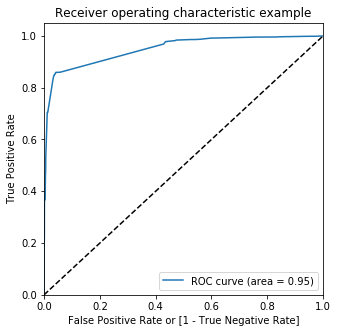

In [1700]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Step 11: Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity


In [1701]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.188037,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.194070,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.000805,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.782077,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977003,7987,1,1,1,1,1,1,1,1,1,1,1


##### For various probability cutoffs - calculate accuracy Specificity and Sensitivity.

In [1702]:
#Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.705873  0.981603  0.533163
0.2   0.2  0.910408  0.859771  0.942125
0.3   0.3  0.918910  0.859362  0.956210
0.4   0.4  0.920013  0.858136  0.958771
0.5   0.5  0.919383  0.851594  0.961844
0.6   0.6  0.920170  0.851594  0.963124
0.7   0.7  0.919225  0.845053  0.965685
0.8   0.8  0.878287  0.705233  0.986684
0.9   0.9  0.813258  0.524530  0.994110


##### For various probability cut off - plotting accuracy specificity and sensitivity curve

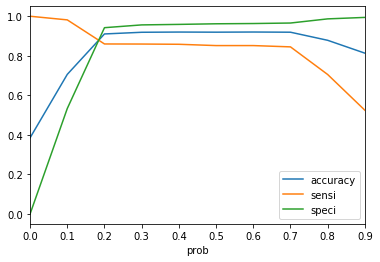

In [1703]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

In [1704]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.188037,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.194070,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.000805,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.782077,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.977003,7987,1,1,1,1,1,1,1,1,1,1,1,1


### Assigning the lead score

In [1705]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.188037,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.194070,1012,0,1,1,0,0,0,0,0,0,0,0,0,19
2,0,0.000805,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.782077,4750,1,1,1,1,1,1,1,1,1,0,0,1,78
4,1,0.977003,7987,1,1,1,1,1,1,1,1,1,1,1,1,98


##### Recheck Overall Accuracy.

In [1706]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
##### Confusion Matrix (Threshold = 0.2)
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1707]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.9104078097937333


##### Sensitvity

In [1708]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8597710547833197

##### Specificity

In [1709]:
# Let us calculate specificity
TN / float(TN+FP)

0.9421254801536492

##### False Postive Rate - predicting churn(converted) when customer have not churned(converted)

In [1710]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05787451984635083


##### Positive predictive value 

In [1711]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9029626449119794


##### Negative predictive value

In [1712]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9147190452511188


### Plotting ROC Curve

An ROC curve demonstrates several things:

- ROC curve shows us the different values of sensitivity and specificity for different threshold values so that we can choose the best one for our model.
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1713]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - Specificity]')
    plt.ylabel('True Positive Rate / Sensitivity')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1714]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'], drop_intermediate = False )

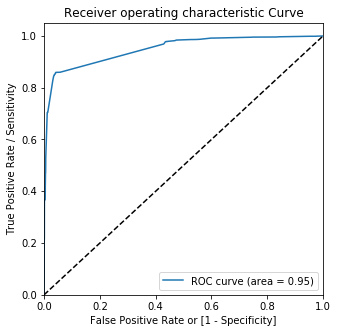

In [1715]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

#### Precision and Recall

In [1716]:
p=precision_score(y_train_pred_final['Converted'] , y_train_pred_final['final_predicted'])
p

0.9029626449119794

In [1717]:
r=recall_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
r

0.8597710547833197

#### F1 Score

In [1718]:
F=2*((p*r)/(p+r))
F

0.8808376963350786

##### Trade off - Precision and Recall

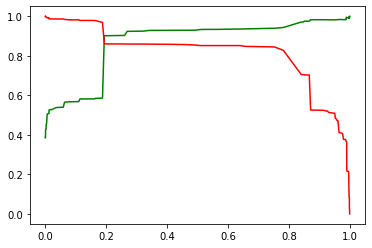

In [1719]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### It cn be seen from above graph that Optimal cutoff value is 0.2

#### Scaling Test Set

In [1720]:
num_cols = X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
X_test[['TotalVisits','Total Time Spent on Website','Pamge Views Per Visit']] = scaler.fit_transform(num_cols)
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,0.304501,-0.591008,4.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.998931
1490,0,0,0.666261,1.894051,5.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.564920
7936,0,0,-0.419021,-0.743117,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-0.133048
4216,0,0,-1.142542,-0.878732,0.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,-1.265027
3830,0,0,1.751544,-0.578179,6.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.130909


##### Selecting RFE columns only

In [1721]:
X_test = X_test[col2]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,0,0,1,0,1,0,0
1490,0,0,0,1,0,0,0,0,1,0,0,0,0
7936,0,0,0,0,0,0,0,0,1,0,1,0,0
4216,0,1,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,1,0,1,0,0


##### Adding Constant

In [1722]:
X_test_sm = sm.add_constant(X_test)

# Step 12: Making predictions on the Test set

In [1723]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:15]

3271    0.188037
1490    0.961508
7936    0.188037
4216    0.999049
3830    0.188037
1800    0.961508
6507    0.012329
4821    0.000445
4223    0.996691
4714    0.188037
3977    0.990228
4209    0.188037
2320    0.004367
3744    0.002868
2570    0.867357
dtype: float64

In [1724]:
# Converting y_pred to a dataframe from array.
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.188037
1490,0.961508
7936,0.188037
4216,0.999049
3830,0.188037


In [1725]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.188037
1,1,1490,0.961508
2,0,7936,0.188037
3,1,4216,0.999049
4,0,3830,0.188037


In [1726]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.188037
1,1490,1,0.961508
2,7936,0,0.188037
3,4216,1,0.999049
4,3830,0,0.188037


In [1727]:
# adding our prediction for threshold value of 0.2
y_pred_final['final_predicted'] = y_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.2 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.188037,0
1,1490,1,0.961508,1
2,7936,0,0.188037,0
3,4216,1,0.999049,1
4,3830,0,0.188037,0


##### Overall accuracy.

In [1728]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['final_predicted'])

0.906720528828498

In [1729]:
confusion_3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_3

array([[1635,   99],
       [ 155,  834]], dtype=int64)

In [1730]:
TP = confusion_3[1,1] # true positive 
TN = confusion_3[0,0] # true negatives
FP = confusion_3[0,1] # false positives
FN = confusion_3[1,0] # false negatives

##### Sensitivity

In [1731]:
TP / float(TP+FN)

0.8432760364004045

##### Specificity

In [1732]:
TN / float(TN+FP)

0.9429065743944637

##### Precision

In [1733]:
p1=precision_score(y_pred_final['Converted'] , y_pred_final['final_predicted'])
p1

0.8938906752411575

##### Recall

In [1734]:
r1=recall_score(y_pred_final['Converted'], y_pred_final['final_predicted'])
r1

0.8432760364004045

#### F1 Score

In [1735]:
F=2*((p1*r1)/(p1+r1))
F

0.8678459937565037

#### Trade off - Precision and Recall

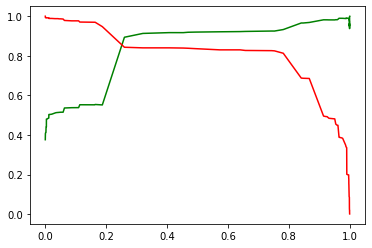

In [1736]:
p, r, thresholds = precision_recall_curve(y_pred_final['Converted'], y_pred_final['Converted_prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()